# Description

You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.
In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017. 


# Task 

In this project, I conduct an Exploratory Data Analysis to identify patterns and trends in the video game consumer market. My goal is to extract insights that will assist ICE in choosing which video games to feature on their website. 

# Table of Contents <a id='back'> </a>

* [1. Loading and Cleaning Data](#load) 
* [2. Exploratory Data Analysis - General](#explore)
* [3. Exploratory Data Analyss - Post-2013](#2013)
* [4. Playstation 4 - Analysis of Sales and Scores](#play)
* [5. Analysis of Top Performing Games](#top)
* [6. Analysis of Genres](#genre)
* [7. Analysis of Different Geographical Locations](#geo)
* [8. Hypothesis Testing](#test)
* [9. Conclusion](#end) 

# Loading and Cleaning Data <a id = 'load'><a/>

In [331]:
import pandas as pd
import plotly.express as px
import seaborn as sns 
import numpy as np
from matplotlib import pyplot as plt
import plotly.subplots as sp
from scipy import stats as st

In [332]:
#  loading data to variable
try:
    data = pd.read_csv('moved_games.csv')  # for local host
except:
    data = pd.read_csv('/datasets/games.csv') # for the platform

In [333]:
# inspecting data
print(data.shape)

data.info()

data.head(5)


(16715, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Initial comments on data:
    
    - missing values will need to be addressed
    - need to address incorrect data types 
    - change caolumn names and categorical values to lowercase 



In [334]:
# changing column names to lowercase 
data.columns = data.columns.str.lower()

# changing categorical data column values to lowercase
cats = ['name', 'platform', 'genre']
for column in cats:
    data[column] = data[column].str.lower()


In [338]:
# looking at missing values 
print(data.isna().sum())


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [339]:
#dropping rows with missing essential data
data.dropna(subset = ['name'], inplace = True)

Chose to only drop columns with missing data in the 'name' column since the rest of the data is useless unless it is tied to a game title

In [340]:
# looking at earliest 'year of release' date to see if there is a date cutoff for recorded reviews/ratings
for column in data.columns[8:11]:
    print('Minimum Year Value for {}: {}'.format(column, data[data[column].isna() == False]['year_of_release'].describe()[3]))
    print()

Minimum Year Value for critic_score: 1985.0

Minimum Year Value for user_score: 1985.0

Minimum Year Value for rating: 1985.0



There are no ratings, user scores, or critic scores for any games prior to 1985

In [341]:
#filling in int missing values with 9999
int_columns = ['year_of_release', 'critic_score'] 
data[int_columns] = data[int_columns].fillna(int(9999))

# filling in float missing values with 9999 as a float
data['user_score'] = data['user_score'].fillna(float(9999))

# filling in categorical missing values with 'unknown'
data['rating'] = data['rating'].fillna('unknown')

data.isna().sum() 



name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

I chose to fill in with the integer or float '9999' so that the series datatype remained homogenous. That makes it easier to perform any arithmetic functions on the entire column. I chose to fill the rating column with the string 'unknown' since the column was an object data type.

In [342]:
# getting a look at the data where the user_score value is 'tbd' to get a better understanding of the data
data[data['user_score'] == 'tbd'].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,zumba fitness,wii,2010.0,sports,3.45,2.59,0.00,0.66,9999.0,tbd,E
301,namco museum: 50th anniversary,ps2,2005.0,misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,zumba fitness 2,wii,2011.0,sports,1.51,1.03,0.00,0.27,9999.0,tbd,T
645,udraw studio,wii,2010.0,misc,1.65,0.57,0.00,0.20,71.0,tbd,E
657,frogger's adventures: temple of the frog,gba,9999.0,adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
718,just dance kids,wii,2010.0,misc,1.52,0.54,0.00,0.18,9999.0,tbd,E
726,dance dance revolution x2,ps2,2009.0,simulation,1.09,0.85,0.00,0.28,9999.0,tbd,E10+
821,the incredibles,gba,2004.0,action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,who wants to be a millionaire,pc,1999.0,misc,1.94,0.00,0.00,0.00,9999.0,tbd,E
1047,tetris worlds,gba,2001.0,puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E


In [343]:
# substituting value '101' for the 'tbd' values to create a homogenous series data type
data['user_score'] = data['user_score'].where(data['user_score'] != 'tbd', 101)
data['user_score'] = data['user_score'].astype(float)

I chose to convertthe tbd value to 101 to make it a numerical value, then changed the entire series to a float data type so I am able to perform any necessary arithmetic on this column. It is also easy to exclude 101 from any calculations if need be.

In [354]:
#changing the datatypes of the years of release and critic score columns
 
data['year_of_release'] = data['year_of_release'].astype(int)
data['critic_score'] = data['critic_score'].astype(int)

In [355]:
# checking to make sure data types have been changed
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [357]:
# checking for duplicates
print(f'Duplicates: {data.duplicated().sum()}')

# looking to see if there are duplicates of name & platform values
data[data[['name', 'platform']].duplicated(keep = False) == True]

Duplicates: 0


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,ps3,2012,sports,2.11,0.22,0.00,0.23,83,5.5,E
1190,need for speed: most wanted,x360,2012,racing,0.62,0.78,0.01,0.15,83,8.5,T
1591,need for speed: most wanted,x360,2005,racing,1.00,0.13,0.02,0.10,83,8.5,T
1745,sonic the hedgehog,ps3,2006,platform,0.41,0.06,0.04,0.66,43,4.1,E10+
4127,sonic the hedgehog,ps3,9999,platform,0.00,0.48,0.00,0.00,43,4.1,E10+
5972,need for speed: most wanted,pc,2005,racing,0.02,0.23,0.00,0.04,82,8.5,T
11715,need for speed: most wanted,pc,2012,racing,0.00,0.06,0.00,0.02,82,8.5,T
16230,madden nfl 13,ps3,2012,sports,0.00,0.01,0.00,0.00,83,5.5,E


There are multiple values in the name columns that are the same, but belong to a different platform. However, there seems to be duplicates in both the name and the platform columns. 

Looking at the above duplicates, there are a few games that are the same. Due to some error during data collection, there are two rows with differing data. Upon further research, it looks like the 'Need for Speed: Most Wanted" games are in fact different. Thus, the only rows that I will be merging will be the "Sonic" row. The second madden sales are small enough to drop entirely and the other data values are the same. 

In [359]:
# locking onto duplicate columns
sonic_1 = data.loc[1745]
sonic_2 = data.loc[4127]

# aggregating sales values for both columns and replacing value in the original row
data.loc[1745, sales_cols] = sonic_1[sales_cols] + sonic_2[sales_cols]

In [360]:
# dropping duplicate indexes
data.drop(index = [4127, 16230], inplace = True)

In [361]:
# duplicates have been handled
data[data[['name', 'platform', 'genre']].duplicated(keep = False) == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1190,need for speed: most wanted,x360,2012,racing,0.62,0.78,0.01,0.15,83,8.5,T
1591,need for speed: most wanted,x360,2005,racing,1.00,0.13,0.02,0.10,83,8.5,T
5972,need for speed: most wanted,pc,2005,racing,0.02,0.23,0.00,0.04,82,8.5,T
11715,need for speed: most wanted,pc,2012,racing,0.00,0.06,0.00,0.02,82,8.5,T


In [362]:
# aggregating all sales columns to create total sales column
sales_cols = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
data['total_sales'] = data[sales_cols].sum(axis=1)
data.head() 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,9999,9999.0,unknown,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,9999,9999.0,unknown,31.38


In [364]:
#added decade column to get an idea of the trends in game releases and sales from decade to decade 

year_groupings = []

for i in data['year_of_release']:
    if i < 1980:
        year_groupings.append('1970s')
    elif 1980 <= i < 1990:
        year_groupings.append('1980s')
    elif 1990 <= i < 2000:
        year_groupings.append('1990s')
    elif 2000 <= i < 2010:
        year_groupings.append('2000s')
    elif i >= 2010:
        year_groupings.append('2010s')

data['decade_of_release'] = year_groupings 
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,decade_of_release
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54,2000s
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,9999,9999.0,unknown,40.24,1980s
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52,2000s
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77,2000s
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,9999,9999.0,unknown,31.38,1990s


# Exploratory Data Analysis - General <a id = 'explore'><a/>

In [365]:
# creating function to add percentages columns 
def percent_column(df, agg_column, new_column):
    """Takes the value from a row and returns its percentage of the whole cateogry 
    that it falls into. Creates series of these values."""
    df[new_column] = (df[agg_column]/ df[agg_column].sum()).map(lambda n: '{:.2%}'.format(n))
    return df

                                                                             

In [367]:
# creating table to look at total games released per year
yearly_counts = data.groupby('year_of_release').agg({'year_of_release': 'count', 'total_sales': 'sum'}).rename(columns ={'year_of_release' :'count'})

# adding percentage of total games produced per year and their respective revenues per year
yearly_counts = percent_column(yearly_counts, 'count', '%_of_total_games')
yearly_counts = percent_column(yearly_counts, 'total_sales', '%_total_sales' )


In [369]:
# years with greatest video game production - top 10
yearly_counts.nlargest(10, 'count')

,count,total_sales,%_of_total_games,%_total_sales
year_of_release,,,,
2008,1427,671.50,8.54%,7.53%
2009,1426,658.82,8.53%,7.39%
2010,1255,590.13,7.51%,6.62%
2007,1197,604.75,7.16%,6.78%
2011,1136,507.58,6.80%,5.69%
2006,1006,518.67,6.02%,5.82%
2005,939,457.82,5.62%,5.14%
2002,829,394.97,4.96%,4.43%
2003,775,357.54,4.64%,4.01%


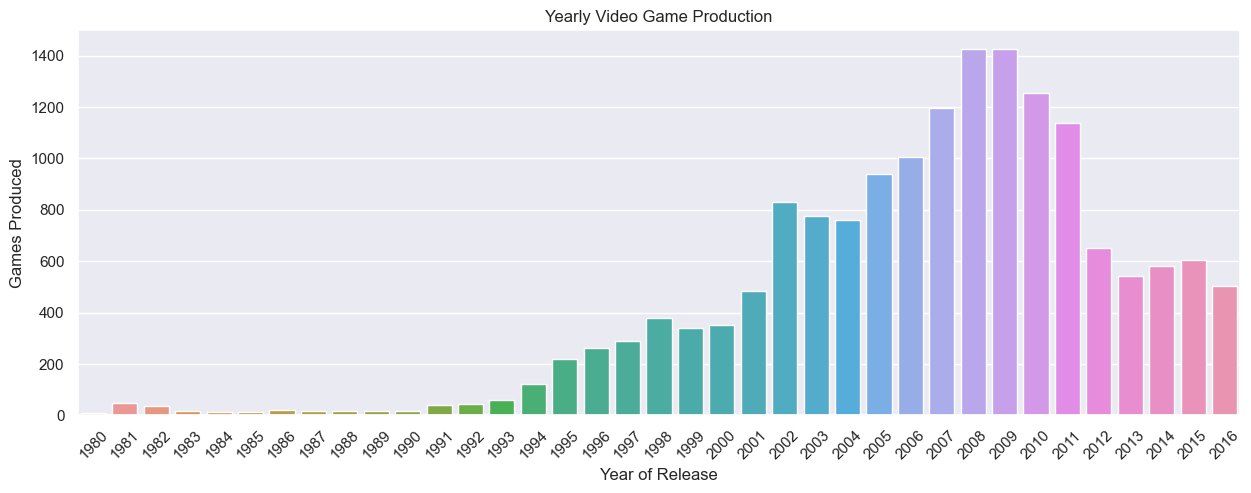

In [370]:
##### visualizing video game production 

# dropping rows with year value of 9999
yc_plot = yearly_counts.drop(9999).reset_index()

sns.barplot(data = yc_plot, x = 'year_of_release', y = 'count').set(title = 'Yearly Video Game Production')
sns.set(rc={'figure.figsize':(15,5)})
plt.ylabel('Games Produced')
plt.xlabel('Year of Release')
plt.xticks(rotation=45)
plt.show()

In [371]:
# looking at total games produced by decade
decade_totals = data.groupby('decade_of_release').agg({'decade_of_release': 'count'}).rename(columns = {'decade_of_release': 'total_games'})

# adding percentages to table
percent_column(decade_totals, 'total_games', 'percentage_of_total')




,total_games,percentage_of_total
decade_of_release,,
1980s,205,1.23%
1990s,1769,10.59%
2000s,9193,55.01%
2010s,5544,33.18%


Here we see a significant spike in video game debuts beginning in the early 2000s, with the 2000s accounting for more than 50% of all video game releases since the 1980s. 



### Analyzing the Top Performing Platforms

In [406]:
platforms = data.groupby('platform').agg({'total_sales': 'sum'})
top_platforms = platforms .nlargest(10, 'total_sales')

In [373]:
def top_games_bar(data, platform, title, ax = None):
    new_df = data.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).loc[platform].reset_index()
    new_df = new_df.drop(new_df.query("year_of_release == 9999").index)
    graph = sns.barplot(data = new_df, x ='year_of_release', y = 'total_sales', ax = ax).set(title= title,
                                                                                            xlabel = 'Year', 
                                                                                             ylabel = 'Total Sales (millions)')

    return graph





[Text(0.5, 1.0, 'Yearly Sales: DS'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Total Sales (millions)')]

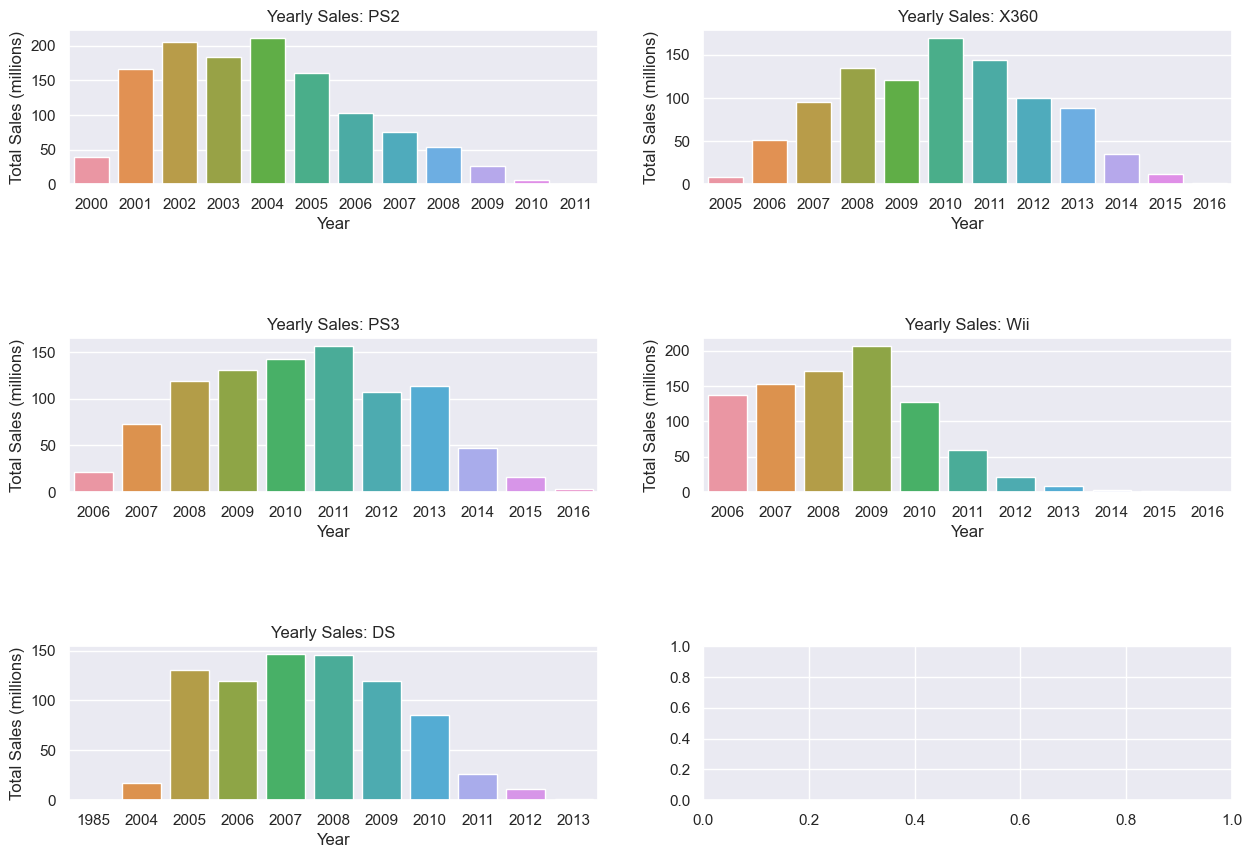

In [375]:
# creating bar charts for total sales for the platforms that sold the most amount of games year over year
fig, axes = plt.subplots(3, 2, figsize = (15, 10))
fig.subplots_adjust(hspace=1, wspace=0.2)


top_games_bar(data, 'ps2', 'Yearly Sales: PS2', ax = axes[0][0])
top_games_bar(data, 'x360', 'Yearly Sales: X360', ax = axes[0][1])
top_games_bar(data, 'ps3', 'Yearly Sales: PS3', ax = axes[1][0])
top_games_bar(data, 'wii', 'Yearly Sales: Wii', ax = axes[1][1])
top_games_bar(data, 'ds', 'Yearly Sales: DS', ax = axes[2][0])

Looking at the top five platforms and their yearly sales above, we see a trend amongst consumers for the first couple of years. For each of these platforms, not including the Wii, the first year of sales starts out small and is usually followed by a major spike. This could reflect hesitancy in the consumer to purchase a the new platform on its first year of release.

**Be sure to recognize the difference in the range of time along the y-axis**

In [423]:
# grouping by platform and locking onto year the platform was released and discontinued/ 
# filtering out rows with value 9999 in year_of_release column
plat_minmax= data[data['year_of_release'] != 9999].groupby('platform').agg({'year_of_release': ['min', 'max']})

# filtering out systmes all 'newer' systems still being in active years                                                
discontinued_systems = plat_minmax[plat_minmax['year_of_release']['min'] < 2013].drop(['pc', '3ds']).index


In [424]:
# adding column to top_platforms that shows its active years - using 'platforms' from previous block                                                  
platforms['years_active'] = plat_minmax['year_of_release']['max'] - plat_minmax['year_of_release']['min']

# filtering for the top 10 systems in sales that have been discontinued - removed DS due to the nature of its 
# production
top_discontinued = platforms[platforms.index.isin(discontinued_systems)].drop('ds').nlargest(10, 'total_sales')

active_mean = top_discontinued['years_active'].mean()
print(f'Average years active for the top successful platforms that have been discontinued: {active_mean:.2f} years')

top_discontinued


Average years active for the top successful platforms that have been discontinued: 10.10 years


,total_sales,years_active
platform,,
ps2,1255.77,11
x360,971.42,11
ps3,940.12,10
wii,907.51,10
ps,730.86,9
gba,317.85,7
psp,294.05,11
xb,257.74,8
gb,255.46,13


Looking at the average length of the top ten discontinued systems in market history, the avergae lifespan of the system on the market is about 10.10 years. Given that PC and DS are often updated rather than replaced by a newer model, it makes sense that they would have a significantly longer lifespan. I chose to remove these platforms since they inaccurately skew the data.  

When a new generation of model is released, it often takes about ~3 years for the old generation model to be officially discontinued. 



### Analyzing the Total Sales of Games 

In [425]:
data['total_sales'].describe()

count    16711.000000
mean         0.533407
std          1.548411
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

In [65]:
# taking glance at total sales across the entire dataset without outliers 
q1 = data['total_sales'].quantile(.25)
q3 = data['total_sales'].quantile(.75)
IQR = q3 - q1

upper_q = q3 + IQR *1.5
data_no_outliers = data[data['total_sales'] < upper_q]


<Figure size 800x600 with 0 Axes>

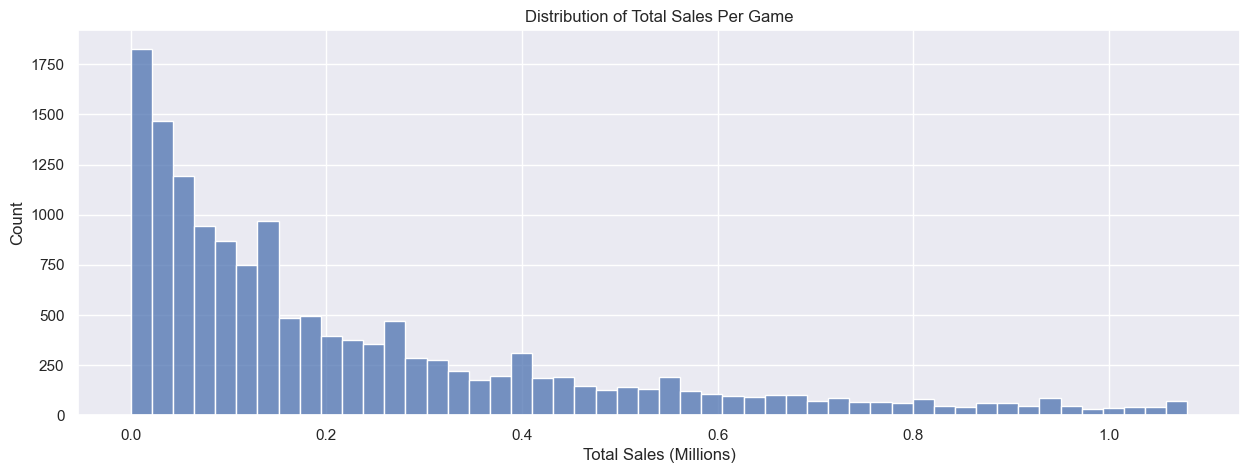

<Figure size 800x600 with 0 Axes>

In [455]:
# histogram wihtout any outliers - crazy how many outliers are in this dataset
sns.histplot(data_no_outliers, x = 'total_sales').set(title='Distribution of Total Sales Per Game')
plt.xlabel('Total Sales (Millions)')
plt.figure(figsize = (8,6))


The distribution of total sales is highly skewed to the right, showing a high denisty of values below 100,000. I removed outliers to get a better understanding of the behavior of the distribution, however, this dataset has many outliers. It is interesting to see how many video games end in small returns. The market is mainly driven by juggernauts. 

I have concluded the general exploratory data analysis and will now be moving forward with the problem this project is focusing on: predicting which games should be featured on the ICE website. 
    
Moving forward with the data, I have decided that it isn't relevant to include systems that pre-date 2013. I chose to only analyze post-2013 video games sales since these are more representative of platforms that are still in use. 

# Exploratory Data Analysis - Post - 2013 <a id = '2013'><a/>

In [78]:
# creating dataframe for games made 2013 and later/ dropping columns I will no longer be using
up_data = data[data['year_of_release'] >= 2013].drop('decade_of_release', axis = 1).reset_index(drop = True)
up_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,9999,9999.0,unknown,14.63
3,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,9999,9999.0,unknown,14.60
4,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


In [429]:
# grouping data to look at total sales per platform
top_platforms = up_data.groupby('platform').agg({'total_sales': 'sum'}).sort_values('total_sales', ascending = False)

top_list = []
for i in range(0,9):
    top_list.append(top_platforms.index[i])
    
top_list

['ps4', 'ps3', 'xone', 'x360', '3ds', 'wiiu', 'pc', 'psv', 'wii']

In [434]:
# grouping total sales by platform and year of release
sales_trends = up_data.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).reset_index()

# creating pivot table to show sales trends year over year by platform
trends_piv = pd.pivot_table(sales_trends, index = 'platform', columns = 'year_of_release', values = 'total_sales')

# selecting the top 10 platforms; dropping those sales that don't have recorded year
trends_piv = trends_piv[trends_piv.index.isin(top_list)].drop(9999, axis = 1)

# creating list of years to add up total sales columns
years = [2013, 2014, 2015, 2016]
trends_piv['total_sales'] = trends_piv[years].sum(axis = 1)

trends_piv.sort_values('total_sales', ascending = False)

year_of_release,2013,2014,2015,2016,total_sales
platform,,,,,
ps4,25.99,100.00,118.90,69.25,314.14
ps3,113.25,47.76,16.82,3.60,181.43
xone,18.96,54.07,60.14,26.15,159.32
3ds,56.57,43.76,27.78,15.14,143.25
x360,88.58,34.74,11.96,1.52,136.80
wiiu,21.65,22.03,16.35,4.60,64.63
pc,12.38,13.28,8.52,5.25,39.43
psv,10.59,11.90,6.25,4.25,32.99
wii,8.59,3.75,1.14,0.18,13.66


From the above table, the following trends: 
    
    - Gaming sales for PC and mobile are trending downward
    - Though total sales for the 3DS were exceptional, however, we have seen a ~ 73% reduction in sales over for years
    - Platform sales have steadily been no the rise; platform systems tend to have a slow start and pick up sales in the following years past its release
    - The PS4 is outperforming the XBOX ONE considerabley

In [110]:
#these platforms are my top picks for maximizing profit
top_picks = ['3ds', 'pc', 'ps4', 'xone', 'wiiu']


In [113]:
profit_platforms = up_data[up_data['platform'].isin(top_picks)]

fig =px.box(profit_platforms, x = 'platform', 
            y = 'total_sales',
            labels = {'total_sales':'Total Sales (millions)',
                     'platform': 'Platform'},
            title = 'Boxplot Distribution of Total Sales by Platform',
            )
fig.update_yaxes(range=[0, 5])
fig.show()

# chose to edit the ylimit to remove some of the larger outliers and better show the distribution of values amongst
# each platform

In [436]:
profit_platforms.groupby('platform').agg({'total_sales': 'mean'})\
.rename(columns = {'total_sales': 'mean_total_sales (millions)'}).sort_values('mean_total_sales (millions)', 
                                                                             ascending = False)



,mean_total_sales (millions)
platform,
ps4,0.801378
xone,0.645020
wiiu,0.562000
3ds,0.464437
pc,0.209660


[Text(0.5, 0, 'PC Game Sales')]

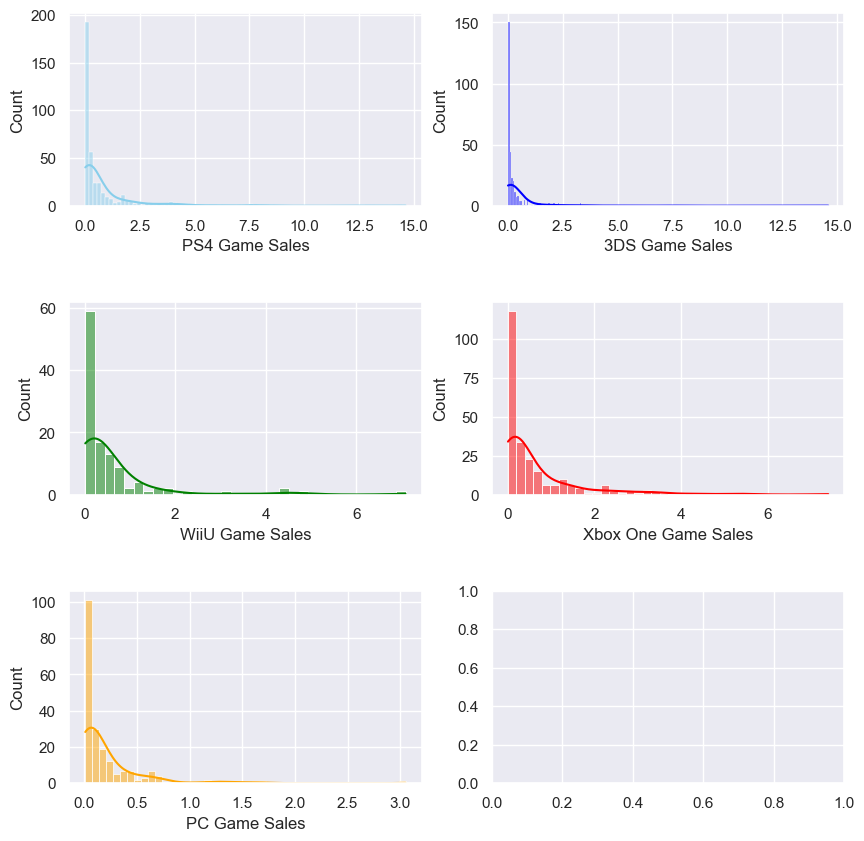

In [437]:
test = pd.pivot_table(profit_platforms,
              index = 'name',
              columns = 'platform',
              values = 'total_sales')

fig, axs = plt.subplots(3, 2, figsize=(10, 10))
fig.subplots_adjust(hspace= .5, wspace=0.2)

sns.histplot(data= test, x="ps4", color="skyblue", kde=True, ax=axs[0, 0]).set(xlabel = 'PS4 Game Sales')
sns.histplot(data= test, x= "3ds", color="blue", kde=True, ax=axs[0, 1]).set(xlabel = '3DS Game Sales')
sns.histplot(data= test, x= "xone", color="red", kde=True, ax=axs[1, 1]).set(xlabel = 'Xbox One Game Sales')
sns.histplot(data= test, x= "wiiu", color="green", kde=True, ax=axs[1, 0]).set(xlabel = 'WiiU Game Sales')
sns.histplot(data= test, x= "pc", color="orange", kde=True, ax=axs[2, 0]).set(xlabel = 'PC Game Sales')







    
I have chosen these five platforms as they are the most recent releases in the market. 
    
Looking at the box plots and histograms above, we see a similar trend for each platform's distribution: each distribution is skewed to the right, with the median value closer to the 1st quartile, with many outliers lying outside the upper bound. 
    
Though the the Playstation dominates in total sales, it is interesting to see that the median amongst the WiiU, Xbox one, and Playstation 4 were all similar. It seems that producing games on these three platforms would all offer a good hedge against the risk of a game of lesser demand; however, it is no doubt that the Playstation 4 is the most popular amongst all the platforms. Having a larger portion of ICE's website featuring Playstation 4 games would be a wise decision. 

I will continue to look at sales post 2013 as I move through the remainder of my analysis. 

</div>

# Playstation 4 - Sales and Critic/User Scores <a id = 'play'><a/>

<AxesSubplot: >

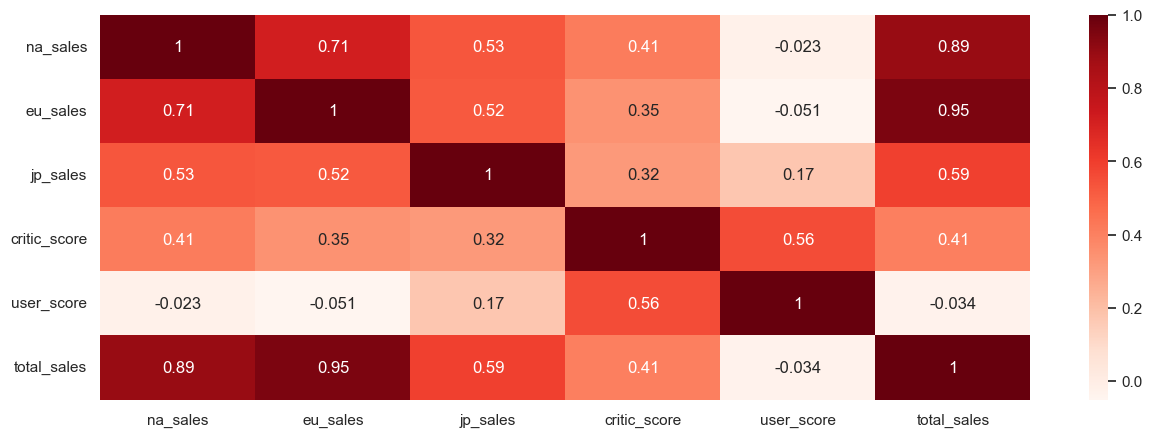

In [156]:
# creating heatmap for correlation matrix 
ps4_corr= up_data.query("(platform == 'ps4') & (user_score != 9999) & (critic_score != 9999) & (user_score != 101)")\
.drop(['year_of_release', 'other_sales'], axis = 1)

sns.heatmap(ps4_corr.corr(), cmap = "Reds", annot = True)


In [438]:
# filtering for rows with ps4 and filtering out rows with missing values in critic score column
ps4_critic = up_data.query("(platform == 'ps4') & (critic_score != 9999)")

# creating scatter of ps4 vs critic score values
px.scatter(ps4_critic, 
           x = 'critic_score', 
           y = 'total_sales', 
           title = 'Critic Score vs Total Sales: Platstation 4')

In [441]:
# filtering for rows with ps4 and filtering out rows with missing values in user score column
ps4_user= up_data.query("(platform == 'ps4') & (user_score != 9999) & (user_score != 101)")

# creating scatter of ps4 vs user score values
px.scatter(ps4_user, 
           x = 'user_score', 
           y = 'total_sales', 
           title = 'User Score versus Total Sales: PS4')

Critic scores and sales amongst all three countries have a positive moderate correlation. Critics seem to have a stronger pulse on what is going to sell well. With regard to user scores, Japan looks to have a positive correlation, while North America and Europe have slight negative correlations. Japan seems to respond a bit better to user scores, while North America and Europe sales seem to be hardly affected by User scores.

# Analysis of Top Performing Video Games <a id = 'top'><a/>

In [444]:
# creating grouping of top games
top_games = profit_platforms.groupby('name').agg({'total_sales': 'sum'}).nlargest(20, 'total_sales').index

In [446]:
# establishing variable for platforms I am interested in 
best_platforms = ['ps4', 'xone']

# grouping by name and platform and aggregating total sales 
best = profit_platforms.groupby(['name', 'platform']).agg({'total_sales': 'sum'})\
    .reset_index().set_index('name')

# locking onto the names of the top 15 games by total sales
games = best.nlargest(15, 'total_sales').index

# locking onto the top 15 games and their sales per platform
best = best[(best['platform'].isin(best_platforms)) & (top.index.isin(games))]

# creating pivot table of xone vs ps4 top game sales
top_pivot = pd.pivot_table(best,
              index = 'name',
              columns = 'platform',
              values = 'total_sales')
top_pivot 

platform,ps4,xone
name,,
call of duty: advanced warfare,7.66,5.26
call of duty: black ops 3,14.63,7.39
destiny,5.64,3.37
fallout 4,7.17,4.22
fifa 15,6.08,2.18
fifa 16,8.58,3.25
fifa 17,7.60,2.65
grand theft auto v,12.62,5.47
star wars battlefront (2015),7.98,3.66


I wanted to compare the best selling games for both platforms. In the above table, the PS4 steadily outperforms the Xbox one. This trend has held true throughout the years. Sony platforms have often outperformed Microsoft platforms.

# Analysis of Genres <a id = 'genre'><a/>

In [ ]:
# aggregating total sales and games data for each genre in alphabetical order
genre_agg = up_data.groupby('genre').agg({'total_sales': 'sum', 'name': 'count'}).rename(columns = {'name': 'total_games'})
genre_agg.index = sorted(genre_agg.index.values)

# adding percentage columns to table to show each genres share of total games and sales
genre_totals = percent_column(genre_agg, 'total_sales', 'percentage_total_sales')
genre_totals = percent_column(genre_totals, 'total_games', 'percentage_total_games')


genre_totals


In [226]:
# creating dataframe that only includes the top five genres based on total sales
top_g = genre_totals.sort_values('total_sales', ascending = False).iloc[0:5].index
top_genres = up_data[up_data['genre'].isin(top_g)]


In [448]:
# creating box plot of the top genres' sales 
genres_fig = px.box(top_genres, x="genre", 
                    y="total_sales",
                    labels = {'total_sales':'Total Sales (millions)', 'genre': 'Genre'},
                   title = 'Box Distribution Plots of Top Performing Genres')
genres_fig.update_yaxes(range=[0,6])



First, it is common when cleaning data to address any outliers. However, in this dataset, we see that there are a great many outliers in all genres. I chose to not remove any outliers due to their frequency as well as the fact that outliers make up the majority of total sales in each of the genres. The frequency of outliers in a given genre is a key performance indicator of the success of the genre.  

In [229]:
bottom_g = genre_totals.sort_values('total_sales').iloc[:3].index
bottom_genres = data[data['genre'].isin(bottom_g)]

In [451]:
bgenre_fig = px.box(bottom_genres, x="genre", 
                    y="total_sales", 
                    labels = {'total_sales': 'Total Sales (millions)', 'genre': 'Genre'},
                   title = 'Box Distribution Plots of the Least Popular Genres')
bgenre_fig.update_yaxes(range =[0,5])


The bottom genres display a similar pattern to the top genres an average, that being significantly skewed to the right with saturated tails, thought their values are much lower. Sales are mainly driven by outliers, with a majority of games not making more than a half a million in sales. 


In [232]:
def find_outlier_sales(data, genre):
    sales = data[data['genre'] == genre]['total_sales']
    Q3 = sales.quantile(.75)
    IQR = Q3 - sales.quantile(.25)
    upper_bound = Q3 + IQR*1.5
    
    total_outlier_perc =[]
    outlier_sales_perc =[]

    counter = 0
    top_sales = 0
    total_sales = 0

    for i in sales:
        total_sales += i
        if i > upper_bound:
            counter += 1
            top_sales += i 

    out_perc = (counter/len(sales))
    total_outlier_perc.append(format(out_perc, '.2%'))
    out_sales = (top_sales/total_sales)
    outlier_sales_perc.append(format(out_sales, '.2%'))

    

    
    
    return total_outlier_perc + outlier_sales_perc

In [236]:
genres = genre_totals.index


for i in genres:
    out = find_outlier_sales(up_data, i)
    print(f'{i.upper()}:')
    print(f'Total percentage of outliers: {out[0]}')
    print(f'Percentage of total sales from outliers: {out[1]}')
    print()



ACTION:
Total percentage of outliers: 11.84%
Percentage of total sales from outliers: 65.26%

ADVENTURE:
Total percentage of outliers: 11.76%
Percentage of total sales from outliers: 67.28%

FIGHTING:
Total percentage of outliers: 14.13%
Percentage of total sales from outliers: 70.08%

MISC:
Total percentage of outliers: 12.50%
Percentage of total sales from outliers: 66.50%

PLATFORM:
Total percentage of outliers: 14.46%
Percentage of total sales from outliers: 56.80%

PUZZLE:
Total percentage of outliers: 10.71%
Percentage of total sales from outliers: 45.98%

RACING:
Total percentage of outliers: 12.04%
Percentage of total sales from outliers: 63.35%

ROLE-PLAYING:
Total percentage of outliers: 12.30%
Percentage of total sales from outliers: 67.74%

SHOOTER:
Total percentage of outliers: 11.68%
Percentage of total sales from outliers: 55.49%

SIMULATION:
Total percentage of outliers: 7.69%
Percentage of total sales from outliers: 61.34%

SPORTS:
Total percentage of outliers: 10.94%


Looking at the distribution of the different genres offers some key insight.
    
The least popular genres tend to be significantly less in demand, despite having a competitive amount of games circulating in the market. This could indicate that the demand is lower due to the type of game dynamic versus low supply or game diveristy within a specific genre. Plainly, these genres are seen as less desirable by the consumer market on the whole. 
    
When looking at the top genres, we see something slightly different. As demonstrated by the less popular genres, more games in production does not necessarily mean more sales, indicating that the top genre gaming dynamics are favored compared to those genres with similar game totals in circulation. We can also see that a majority of sales in these genres come from outliers in the distribution. For example, looking at the above block, 11.8% of games in the "action" genre account for 65.2% of all sales in that genre. This is consistent across most of the genres, where outliers are responsible for more than 50% of the total revenue in each genre. We do not see this in two of the bottom genres, strategy and puzzle, so there are more sales dispersed throughout the bottom 90 or so percent. 
    
That all being said, the top genres have a significantly higher median value that the bottom genres, with more outliers as well. So not only is there a higher liklihood of producing higher returns if you were to produce a game in the more popular genres, but there is also a higher chance of producing a hit game, given the number of outliers present. Though it may be a contreversial take, I would argue that breaking into a genre with more outliers could offer a higher chance of producing a hit, given there seems to be wider demand for different games within the genre, as compared to strongly loyal consumers in a genre where a smaller amount of games are responsible for the majority of sales. More research would be needed. 
 

</div>

# Analysis of Preferences by Geographic Location <a id = 'geo'><a/>

In [284]:
#function to group by country and agg total sales and their respective percentage of global sales for platfrom, genre,
# and rating - continuing to use data post-2013

def geo_function(data, group, geo_sales):
    """Takes the data and groups it by the country of choice. Takes the top 5 index values based on 
    the grouping of choice and creates a table that displays total sales per grouping and their 
    share of the total sales worldwide."""

    geo_name = data.groupby(group).agg({geo_sales: 'sum'}).nlargest(5, geo_sales)

    loop = geo_name.index
    totals = []

    for i in loop:
        g = data[data[group] == i]['total_sales'].sum()
        totals.append(g)

    geo_name['%_global_sales'] = (geo_name[geo_sales]/totals).map(lambda n: '{:.2%}'.format(n))
    return geo_name

## Japan

In [285]:
# breakdown of preferences in platform along with total market share 
geo_function(up_data, 'platform', 'jp_sales')


,jp_sales,%_global_sales
platform,,
3ds,67.86,46.98%
ps3,24.13,12.75%
psv,18.66,56.12%
ps4,15.96,5.08%
wiiu,10.88,16.83%


In [286]:
# breakdown of preferences in genre along with total market share 
geo_function(up_data, 'genre', 'jp_sales')


,jp_sales,%_global_sales
genre,,
role-playing,53.06,35.52%
action,41.78,11.95%
misc,10.29,13.71%
fighting,7.85,19.54%
shooter,6.69,2.74%


In [295]:
# breakdown of preferences in rating along with total market share 
geo_function(up_data, 'rating', 'jp_sales')


,jp_sales,%_global_sales
rating,,
unknown,90.24,29.92%
T,21.29,14.49%
E,15.29,6.70%
M,14.77,3.86%
E10+,5.89,4.55%


## Europe

In [288]:
# breakdown of preferences in platform along with total market share 
geo_function(up_data, 'platform', 'eu_sales')


,eu_sales,%_global_sales
platform,,
ps4,141.09,44.91%
ps3,70.41,37.20%
xone,51.59,32.38%
x360,44.96,30.59%
3ds,31.17,21.58%


In [289]:
# # breakdown of preferences in genre along with total market share 
geo_function(up_data, 'genre', 'eu_sales')

,eu_sales,%_global_sales
genre,,
action,126.27,36.13%
shooter,90.68,37.15%
sports,65.98,38.30%
role-playing,37.44,25.07%
racing,22.21,49.28%


In [290]:
# # breakdown of preferences in rating along with total market share 
geo_function(up_data, 'rating', 'eu_sales')

,eu_sales,%_global_sales
rating,,
M,149.29,38.99%
E,89.74,39.35%
unknown,82.56,27.37%
E10+,47.38,36.58%
T,47.19,32.13%


## North America

In [292]:
# breakdown of preferences in platform along with total market share 
geo_function(up_data, 'platform', 'na_sales')


,na_sales,%_global_sales
platform,,
ps4,108.74,34.62%
xone,93.12,58.45%
x360,88.39,60.14%
ps3,66.86,35.33%
3ds,39.04,27.03%


In [293]:
# breakdown of preferences in genre along with total market share 
geo_function(up_data, 'genre', 'na_sales')

,na_sales,%_global_sales
genre,,
action,141.89,40.60%
shooter,117.15,48.00%
sports,78.50,45.57%
role-playing,47.17,31.58%
misc,35.19,46.89%


In [294]:
# breakdown of preferences in genre along with total market share 
geo_function(up_data, 'rating', 'na_sales')

,na_sales,%_global_sales
rating,,
M,170.80,44.60%
unknown,104.26,34.56%
E,97.80,42.88%
E10+,62.06,47.91%
T,61.94,42.17%


There are obvious trends in each geographic location for rating, genre, and platform when choosing to purchase a game. I will explain more deeply in my overall concllusion. 

# Hypothesis Testing <a id = 'test'><a/>

Before starting any testing, I am going to remove all rows with filled in missing values in the 'user score' column as they will negatively impact my test results.

In [312]:
# filtering out rows with filled missing values in the user score column
test_data = up_data[(up_data['user_score'] != 9999)&(up_data['user_score'] != 101)]


### Xbox One versus PC User Scores

I am going to use statistical testing to see if there is a signifcant difference in user scores for games on the Xbox One versus PC. My null and alternative hypotheses are: 

    H0 = The mean user score for the Xbox One and the PC platforms are equal.
    H1 = The mean user score for the Xbox One and the PC platforms are not equal

Since h-testing is testing the similarity in behavior of two groups, the null hypothesis will always be stated in a way that indicates equality between two values.
    


In [315]:
# creating dataframes for testing - filtering out filled missing values from dataset
pc_uscores = test_data[test_data['platform'] == 'pc']['user_score']
xone_uscores = test_data[test_data['platform'] == 'xone']['user_score']



In [306]:
# before testing, it is important to check how the variance differs between the two groups

print(f'''
PC User Scores Variance: {pc_uscores.var()},
Xbox One User Scores Variance: {xone_uscores.var()}
''')


PC User Scores Variance: 2.9645628263139563,
Xbox One User Scores Variance: 1.9069968429360702



Good thing we checked for the difference in variance. I will need to use the 'equal_var' parameter in order to to get an accurate test result.

In [307]:
alpha = .05 

t1_results = st.ttest_ind(pc_uscores, xone_uscores, equal_var = False)

p1_val = t1_results.pvalue
print(p1_val)

if p1_val > alpha:
    print(f'We can not reject the null hypothesis.')
else:
    print(f'We reject the null hypothesis.')

0.23850162736475095
We can not reject the null hypothesis.


Given the results of the test, we can not reject the hypothesis. Assuming that the mean for both of these populations are the same, the probability of getting the results that we did from our test is 23.9%, which is well beyond the siginifcance threshold of 5%. Though it may not be true, there is not enough evidence to deny that the difference between the means of the two populations is statistically significant. 
    
I chose a significance threshold of 5% due to the relatively low risk of a type 2 error. It seems that would be enough to properly understand the significance of my results. 
   
I chose the ttest_ind method since I was comparing the two means of two separate samples within a population. Looking at the difference in their variance, I utilized the equal_var parameter and set it to false to make up for the difference. 


### Action versus Sports User Scores

<div class="alert alert-info"> 
<b>Student's comment v.1</b> 

THe hypotheses are the following:

    H0 = The mean user score for the Action and the Sports genres are equal. 
    H1 = The mean user score for the Action and the Sports genres are not equal.

</div>

In [320]:
# filtering for user score values in action and sports genres
action_uscores = test_data[test_data['genre'] == 'action']['user_score']
sport_uscores = test_data[test_data['genre'] == 'sports']['user_score']


In [322]:
# looking at variances in both series

print(f'''
Action User Scores Variance: {action_uscores.var()},
Sports User Scores Variance: {sport_uscores.var()}
''')


Action User Scores Variance: 1.804768579207421,
Sports User Scores Variance: 3.441196041527534



In [323]:
# running test

alpha = .05 

t2_results = st.ttest_ind(action_uscores, sport_uscores,equal_var = False)

p2_val = t2_results.pvalue
print(p2_val)

if p2_val > alpha:
    print(f'We can not reject the null hypothesis.')
else:
    print(f'We reject the null hypothesis.')

2.3672011662072006e-16
We reject the null hypothesis.


According to the test, the difference in mean user score for the 'sports' and 'action' genre is significant. We reject the null hypothesis

# Conclusion <a id = 'end'><a/>

<div class="alert alert-info"> 
<b>Report</b> 

This dataset as provided many valuable insights that I believe will assist in imporving sales in the next year. 
    
I. Platforms
    
    First, I would like to focus on trending gaming systems. 
    
    The previous generation of gaming systems, namely the PS3 and the Xbox 360, have seen a decline in sales as the modern platforms have entered the market. The average lifespan for the top gaming platforms is ~10 years, giving the newer top platforms plenty of remaining runway. I think it wise to begin focusing on having a majority of the games featured on the website be for these platforms, specifically the Playstation 4, the Xbox one, the Nitnendo 3DS, and games for PCs.  The reason I include the 3DS in these platforms is that mobile gaming, despite its decline in total sales year over year for the past few years, is still a popular form of gameplay, especially in Japan. With that in mind, the 3DS still leads the mobile gaming market, and so I believe it best to maintain a healthy presence of these games on ICE's website. 
    
    The Playstation 4 has quickly ascended and now dominates the market in the three major locations of video game consumtion: North America, Japan, and Europe.  The only two systems that are currently trending upward are the Xbox One and the PS4. Aside from certain exclusive games, when comparing the total sales of top games on both platforms, the Playstation 4 outperforms the Xbox One. 
    
    The median sales price per game also tends to be higher for the in-home style platform, that being those which are not mobile or on a PC. This shows that the average game on a in-home platform beings in more revenue than the average mobile or PC game.   

    I think it is wise to maintain some supply for the top games of the previous generation of platforms, specifically the Playstation 3 and the Xbox 360. I believe these would contrbute well to ICE's revenue stream as there are most likely still be those holding out to adopt the new generation of platforms.

II. Critic and User Scores 
    
    Critic Scores hold a moderate, positive correlation with sales in all three of the major geographicla locations of this analysis: Japan, North America, and Europe. User Scores did not have as strong of a correlation. Out of all locations, Japan was the only location that was positively correlated with user scores, though it considered weak. If a marketing campaign were to be launched, it would be beneficial to feature critic scores in the marketing campaign content. Perhaps it would be useful to include user scores in marketing materials fcoused in Japan. 

III. Genres 
        
    The top five genres in the market are the following: Action, Sports, Shooter, Role-playing, and Platform. The bottom three genres are the following: Puzzle, Adventure, and Strategy. 
    
    
    The first thing that stood out to me was the relationship between total sales and total games for each genre. Prior to my analysis, I initially believed that the more games in circulation, the more sales a given genre would have; however, this is not the case. Shooter, Strategy, Puzzle, and Simulation games all displayed a disproportionate amount of sales given their respective portion of the total market. For the less popular genere, though there are a competitive number of games in circulation, sales remain poor. Whereas, for some of the more popular genres, such as Shooters, sales are quite high given their proportion of games in the market. This tells me that strong sales are primarily due to distinct preference for certain genres, rather than a lack of supply for those that are less popular. It would be best to feature only the extremly high performing games in the lesser demanded genres. 

    I found the platform genre to be quite interesting. It only accounts for 5.31% of all games and 9.29% of all sales; however, its median and mean sales are the highest amongst all genres. This is a reliable genre to feature on the website. It has proven to be a source of stable revenue, as even the less popular games within the genre still show strong sales. 

    Lastly, due to the large presence of outliers in the dataset, I found it interesting to look at the outliers in each of the genres. For each of the genres aside from the puzzle genre, outliers accounted for less than 15% of all games, but were responsible for over 50% of all sales in each respective genre, not including Puzzle or Strategy games. These outliers must be featured on the website. As for the games that populate the rest of the website, genres like platform and other genres with higher medians/averages would be the best choice to secure stable sales. 

IV. Japan Trends 
    
    Japan displays a significant preference for mobile gaming, specifically for the 3DS. It is also interesting that Japan accounts for over 50% of PSV sales. Out of the top five platforms in Japan, three of them are mobile. 
    
    Though consumption of in-home platforms is dwarfed by North America and Europe, it is apparent that Japan has a preference for Sony systems over Microsoft. 
    
    We also see a significant preference for role-playing and action style games, accounting for the majority of their domestic sales. This makes even more sense as we analyze their consumption of games of certain ratings. As seen in a block below, a large percentage of Japan's top two genres have an 'unknown' rating. Given their genre preferences, it would make sense that they do not consume many M rated games.

V. European Trends
    
    Europe has a distinct preference for in-home style gaming, with a strong preference for Sony produced systems; however, both the Xbox one and Xbox 360 were popular as well. The Playstation 4 was an incredible success in Europe. 
    
    Europe's top genres were in line with the top global genres: action, shooter, and sports, with a significant preference for action games. Europe accounts for ~50% of game consumption of the racing genre. 
    
    As compared to Japan, we see a significant jump in preference for M-rated material. Perhaps Japan's consumer demographic is younger, more research would be needed. Either waym, there is a distinct difference in consumer preferences for more graphic content. 

VI. North American Trends
        
    North America has more balanced consumption with regards to specific platforms. Microsoft systems are far more popular in the North America, as they account for more than 50% of global sales for both the Xbox one and the 360. Though, it seems there was a shift of preference with the release of the Playstation 4, as it quickly rose to the top of the charts after its release.
    
    We see the same trend in the top three genres as we did with Europe, which makes sense given these are the top genres globally. Of the top five genres, the North American market consumes the highest amount of shooter style games. 
    
    Lastly, North America shows a strong preference for M rated material. Once again, it would be interested to dive into consumer data to understand differences in demographic between all three regions. 

VII. Hypothesis Testing 
    
    There was no significant difference found between the difference in mean user scores for the xbox one and the PC. 

    There was a significant difference found between the user scores for action and sports games, but I am not exactly sure what causes this difference. 
    
    Though I have plenty of speculations, it would be best to do a deeper analysis to understanding the nature of this difference. It would be interested to create a model that interpreted written user reviews with their score to better understand the differences in criticism. 




</div>